In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer


**Отток клиентов телекоммуникационных компаний**


0. Описания задачи.
Задача: Прогнозирование оттока клиентов телекоммуникационной компании. Предсказываем будет ли клиент расторгать контракт с телеком-компанией в ближайшем будущем.
Имеем 7,043 клиентов, 21 признак и 2 класса.
Типы признаков:
1. Демографические данные
2. Информация об услугах
3. Финансовые показатели

Уходят: 1,869 клиентов (26.5%)юОстаются: 5,174 клиента (73.5%)



In [85]:
url = "https://raw.githubusercontent.com/ilya-agafonov/machine-learning/refs/heads/main/Telco%20Customer%20Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv"
data_raw = pd.read_csv(url)

In [86]:
data_raw.shape

(7043, 21)

In [87]:
data_raw

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [88]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data_raw.describe(include='object')


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [ ]:
data_raw['gender']

,gender
0,Female
1,Male
2,Male
3,Male
4,Female
...,...
7038,Male
7039,Female
7040,Female
7041,Male


**2. Разбить данные на обучающую и тестовую выборки**

In [ ]:
data_clean = data_raw.drop('customerID', axis=1)

X = data_clean.drop('Churn', axis=1)
y = data_clean['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(5282, 1761)

**3. Визуализировать данные и вычислить основные характеристики**

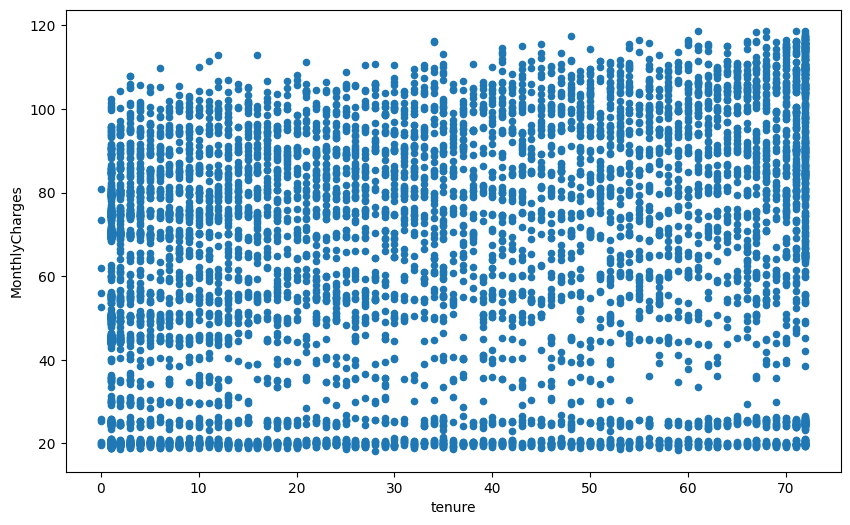

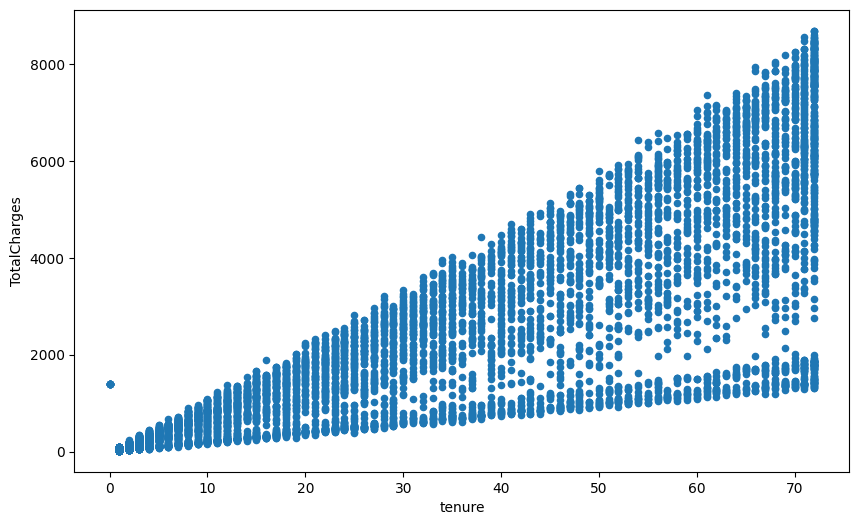

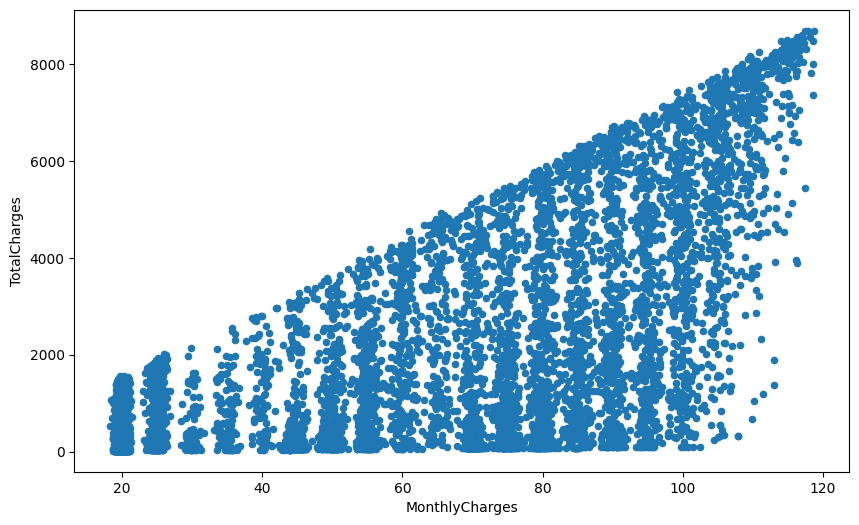

In [83]:
data_clean.plot(kind='scatter', x='tenure', y='MonthlyCharges')
plt.show()

data_clean.plot(kind='scatter', x='tenure', y='TotalCharges')
plt.show()

data_clean.plot(kind='scatter', x='MonthlyCharges', y='TotalCharges')
plt.show()

Распределение целевой переменной Churn

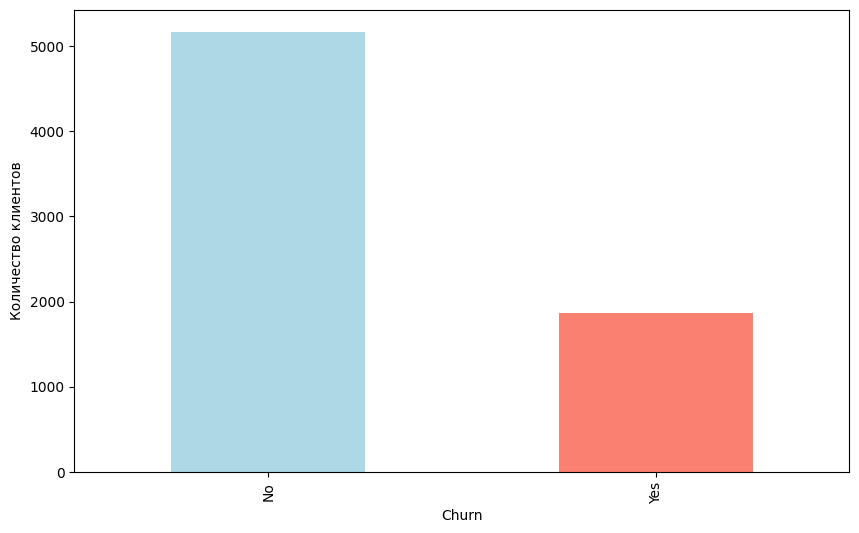

In [82]:
data_clean['Churn'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.xlabel('Churn')
plt.ylabel('Количество клиентов')
plt.show()



**4. Обработка пропущенных значений**

In [ ]:
data_raw.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_raw.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


В этом датасете пропущенные значения выделяются как две запятые с пробелом(, ,), а не как две подряд зяпятые. нужно найти пропущенные значения и обработать их с помощью медианного метода.

In [81]:
empty_strings = data_raw['TotalCharges'].str.strip() == ''
print(f"пропущенных значений в TotalCharges: {empty_strings.sum()}")

if empty_strings.sum() > 0:
    print(data_raw[empty_strings][['customerID', 'TotalCharges']])

median_value = data_raw[data_raw['TotalCharges'].str.strip() != '']['TotalCharges'].astype(float).median()

data_clean = data_raw.copy()

data_clean.loc[empty_strings, 'TotalCharges'] = median_value

data_clean['TotalCharges'] = data_clean['TotalCharges'].astype(float)

print(f"Обработано пропусков: {empty_strings.sum()}")

Найдено пропущенных значений в TotalCharges: 11
      customerID TotalCharges
488   4472-LVYGI             
753   3115-CZMZD             
936   5709-LVOEQ             
1082  4367-NUYAO             
1340  1371-DWPAZ             
3331  7644-OMVMY             
3826  3213-VVOLG             
4380  2520-SGTTA             
5218  2923-ARZLG             
6670  4075-WKNIU             
6754  2775-SEFEE             
Обработано пропусков: 11


Информация о числовых признаках:

In [ ]:
data_raw.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Анализ целевой переменной

In [70]:
churn_distribution = data_raw['Churn'].value_counts()
print(churn_distribution)



Churn
No     5174
Yes    1869
Name: count, dtype: int64


**5. Обработать категориальные признаки**

In [64]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = X_train.select_dtypes(include=['object']).columns
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(X_train[categorical_columns])

dummies_train = pd.DataFrame(
    enc.transform(X_train[categorical_columns]),
    columns=enc.get_feature_names_out(),
    index=X_train.index
)

dummies_test = pd.DataFrame(
    enc.transform(X_test[categorical_columns]),
    columns=enc.get_feature_names_out(),
    index=X_test.index
)
X_train = pd.concat((X_train, dummies_train), axis=1).drop(categorical_columns, axis=1)
X_test = pd.concat((X_test, dummies_test), axis=1).drop(categorical_columns, axis=1)


**6.Провести нормализацию**

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [80]:
data_processed = data_clean.copy()

label_encoder = LabelEncoder()
categorical_columns = data_processed.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('Churn')

for column in categorical_columns:
    data_processed[column] = label_encoder.fit_transform(data_processed[column])


data_processed['Churn'] = label_encoder.fit_transform(data_processed['Churn'])

data_processed['TotalCharges'] = pd.to_numeric(data_processed['TotalCharges'], errors='coerce')
data_processed['TotalCharges'].fillna(0, inplace=True)

X_processed = data_processed.drop('Churn', axis=1)
y_processed = data_processed['Churn']

X_train_proc, X_test_proc, y_train_proc, y_test_proc = train_test_split(
    X_processed, y_processed, test_size=0.25, random_state=42, stratify=y_processed
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_proc)
X_test_scaled = scaler.transform(X_test_proc)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_proc)

y_pred = knn.predict(X_test_scaled)
y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test_proc, y_pred)
conf_matrix = confusion_matrix(y_test_proc, y_pred)
class_report = classification_report(y_test_proc, y_pred)

print("Точность модели KNN:", accuracy)
print("Матрица ошибок:")
print(conf_matrix)
print(class_report)

/tmp/ipython-input-308681675.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_processed['TotalCharges'].fillna(0, inplace=True)


Точность модели KNN: 0.7546848381601363
Матрица ошибок:
[[1091  203]
 [ 229  238]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1294
           1       0.54      0.51      0.52       467

    accuracy                           0.75      1761
   macro avg       0.68      0.68      0.68      1761
weighted avg       0.75      0.75      0.75      1761

